In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
gold_df = pd.read_csv("gold.csv")
gold_df

,labels,text
0,en,Didnt really seem to work much.
1,en,Highly recommend for those who don't like bein...
2,en,Fascinating premise and characters. The only c...
3,en,"This was perfect for my tree and decor, good p..."
4,en,"This product does help with dry skin. However,..."
...,...,...
13995,other,Chi phí cho mỗi hoạt động bưu điện ( xử lý thư...
13996,other,Pássaro preto sentado numa laje de betão.
13997,other,ホバリングが凄く敏感で安定しています。 風速14メートルくらいでも全然平気でした。 地上から...
13998,other,เงา ของ สัตว์ร้าย ถูกจับ adrin และ เขา กระ...


## III Improve language detection

### 1. Benchmark text classification (scikit) algorithms for the language detection task, outperforming your rule-based classifier and naive baselines. For evaluation, use the dataset created in the 1st step. (Hint: you are free to annotate more data or augment your training dataset otherwise.)

#### KNN Classification

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=False)
X = vectorizer.fit_transform(gold_df.text)
y = gold_df.labels

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn import neighbors, linear_model
knn = neighbors.KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

#### Logistic Regression

In [6]:
logistic = linear_model.LogisticRegression(max_iter=1000, multi_class='multinomial')
logistic = logistic.fit(X_train, y_train)

#### SVM

In [7]:
from sklearn import svm
mysvm = svm.SVC(kernel='linear').fit(X_train, y_train)

In [8]:
print(f"KNN accuracy score: {knn.score(X_test, y_test):.3f}")
print(f"Logistic Regression accuracy score: {logistic.score(X_test, y_test):.3f}")
print(f"SVMs accuracy score: {svm.SVC(gamma=0.001, C=100.).fit(X_train, y_train).score(X_test, y_test):1.4f}")
print(f"SVMs@linear accuracy score: {mysvm.score(X_test, y_test):1.4f}")

KNN accuracy score: 0.956
Logistic Regression accuracy score: 0.979
SVMs accuracy score: 0.9789
SVMs@linear accuracy score: 0.9875


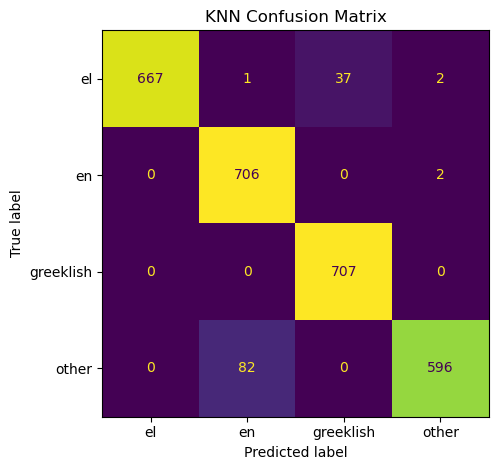

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

ax = ConfusionMatrixDisplay.from_predictions(y_test, knn.predict(X_test), colorbar=False);
plt.title("KNN Confusion Matrix")
plt.tight_layout()
# ax.figure_.savefig('confusion.pdf', format='PDF', dpi=300)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

          el       1.00      0.94      0.97       707
          en       0.89      1.00      0.94       708
   greeklish       0.95      1.00      0.97       707
       other       0.99      0.88      0.93       678

    accuracy                           0.96      2800
   macro avg       0.96      0.95      0.96      2800
weighted avg       0.96      0.96      0.96      2800



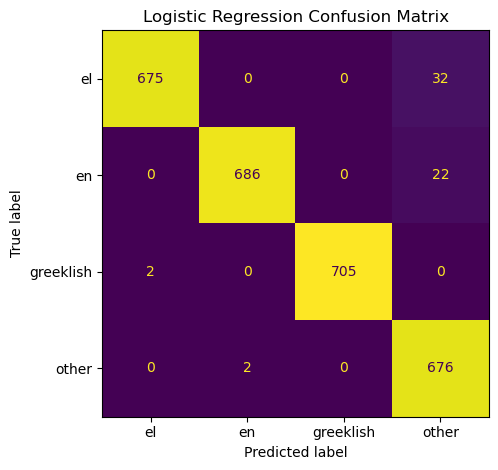

In [11]:
ax = ConfusionMatrixDisplay.from_predictions(y_test, logistic.predict(X_test), colorbar=False);
plt.title("Logistic Regression Confusion Matrix")
plt.tight_layout()
# ax.figure_.savefig('confusion.pdf', format='PDF', dpi=300)

In [12]:
print(classification_report(y_test, logistic.predict(X_test)))

              precision    recall  f1-score   support

          el       1.00      0.95      0.98       707
          en       1.00      0.97      0.98       708
   greeklish       1.00      1.00      1.00       707
       other       0.93      1.00      0.96       678

    accuracy                           0.98      2800
   macro avg       0.98      0.98      0.98      2800
weighted avg       0.98      0.98      0.98      2800



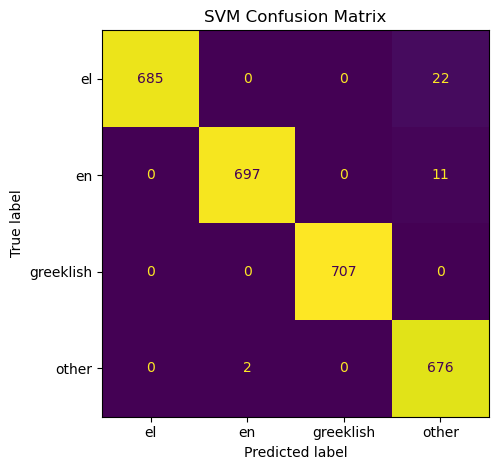

In [13]:
ax = ConfusionMatrixDisplay.from_predictions(y_test, mysvm.predict(X_test), colorbar=False);
plt.title("SVM Confusion Matrix")
plt.tight_layout()
# ax.figure_.savefig('confusion.pdf', format='PDF', dpi=300)

In [14]:
print(classification_report(y_test, mysvm.predict(X_test)))

              precision    recall  f1-score   support

          el       1.00      0.97      0.98       707
          en       1.00      0.98      0.99       708
   greeklish       1.00      1.00      1.00       707
       other       0.95      1.00      0.97       678

    accuracy                           0.99      2800
   macro avg       0.99      0.99      0.99      2800
weighted avg       0.99      0.99      0.99      2800



### 2. Apply your best classifier to each post to annotate mechanically the language of each comment and explore the annotated data. (Hint: use visualisations and extract insightful findings that would not be visible without your mechanical annotations.) A report named report.pdf should comprise these.

In [15]:
crawl_df = pd.read_csv("crawl.csv")
crawl_df

,Unnamed: 0,title,comment,date,language
0,0,ΕΚΑΝΕ ΤΟ ΚΑΛΥΤΕΡΟ NIDALEE GAME! | Dom1nant - Y...,Domizerahansera locoananera,4 months ago,other
1,1,Όταν έχεις συμπαίκτη είναι πιο EASY! - YouTube,μλκ τι εκανες εκει με Nida ρε παιχτη Αυτα τα ...,6 months ago (edited),el
2,2,Όταν έχεις συμπαίκτη είναι πιο EASY! - YouTube,Ο λιλ ποπ ειναι αυτος,6 months ago,other
3,3,Adapting στο game = PERMA ΚΑΛΟΣ - YouTube,wlg epilipsy confirmed,1 year ago,other
4,4,Adapting στο game = PERMA ΚΑΛΟΣ - YouTube,RRRRRRRRRRRRRRRRRRRRRR,1 year ago,other
...,...,...,...,...,...
1024,1025,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Εξαιρετικη,11 hours ago,other
1025,1026,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Δεν υπάρχουν πολλά τέτοια προστατευμενα σημεια...,6 hours ago,el
1026,1027,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Κύριε Σαχίνη θα ήταν ωραία καλεσμένη στις αντ...,8 hours ago,el
1027,1028,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",αυτό το Δεν επηρεάζει ο Ηλιος το Κλίμα εεεεχμμ...,9 hours ago,el


In [16]:
import string
def remove_punctuation(input_text):
    translator = str.maketrans('', '', string.punctuation + string.digits)
    return input_text.translate(translator)

In [17]:
crawl_df.dropna(inplace=True)
crawl_df["comment"] = crawl_df["comment"].apply(remove_punctuation)
crawl_df['comment'] = crawl_df['comment'].str.strip()
crawl_df.drop(axis=1,columns=["Unnamed: 0"],inplace = True)

In [18]:
X = vectorizer.transform(crawl_df.comment)
crawl_df['language'] = mysvm.predict(X)
crawl_df

,title,comment,date,language
0,ΕΚΑΝΕ ΤΟ ΚΑΛΥΤΕΡΟ NIDALEE GAME! | Dom1nant - Y...,Domizerahansera locoananera,4 months ago,other
1,Όταν έχεις συμπαίκτη είναι πιο EASY! - YouTube,μλκ τι εκανες εκει με Nida ρε παιχτη Αυτα τα ...,6 months ago (edited),el
2,Όταν έχεις συμπαίκτη είναι πιο EASY! - YouTube,Ο λιλ ποπ ειναι αυτος,6 months ago,other
3,Adapting στο game = PERMA ΚΑΛΟΣ - YouTube,wlg epilipsy confirmed,1 year ago,other
4,Adapting στο game = PERMA ΚΑΛΟΣ - YouTube,RRRRRRRRRRRRRRRRRRRRRR,1 year ago,other
...,...,...,...,...
1023,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Ευχαριστούμε κύριε Σαχίνη\nΠάντα τέτοιους καλε...,8 hours ago,other
1024,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Εξαιρετικη,11 hours ago,other
1025,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Δεν υπάρχουν πολλά τέτοια προστατευμενα σημεια...,6 hours ago,el
1026,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Κύριε Σαχίνη θα ήταν ωραία καλεσμένη στις αντ...,8 hours ago,el


In [19]:
crawl_df['language'].unique()

array(['other', 'el', 'en'], dtype=object)

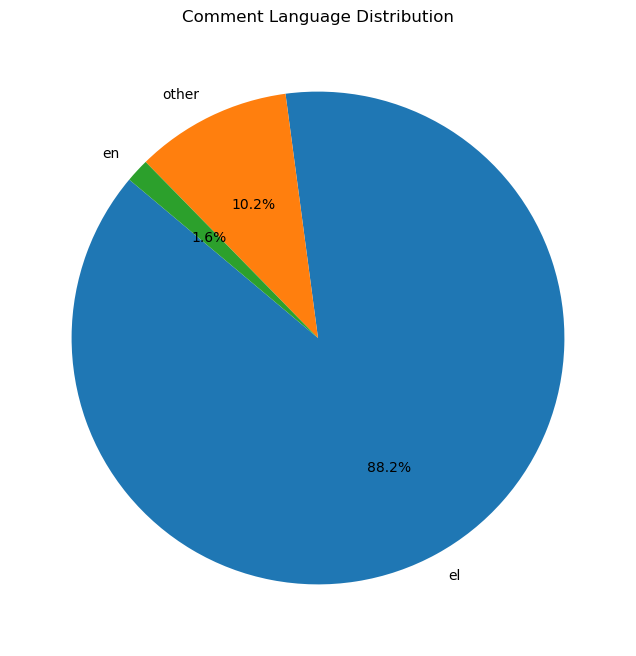

In [21]:
language_counts = crawl_df['language'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Comment Language Distribution')
plt.show()

<Figure size 1000x600 with 0 Axes>

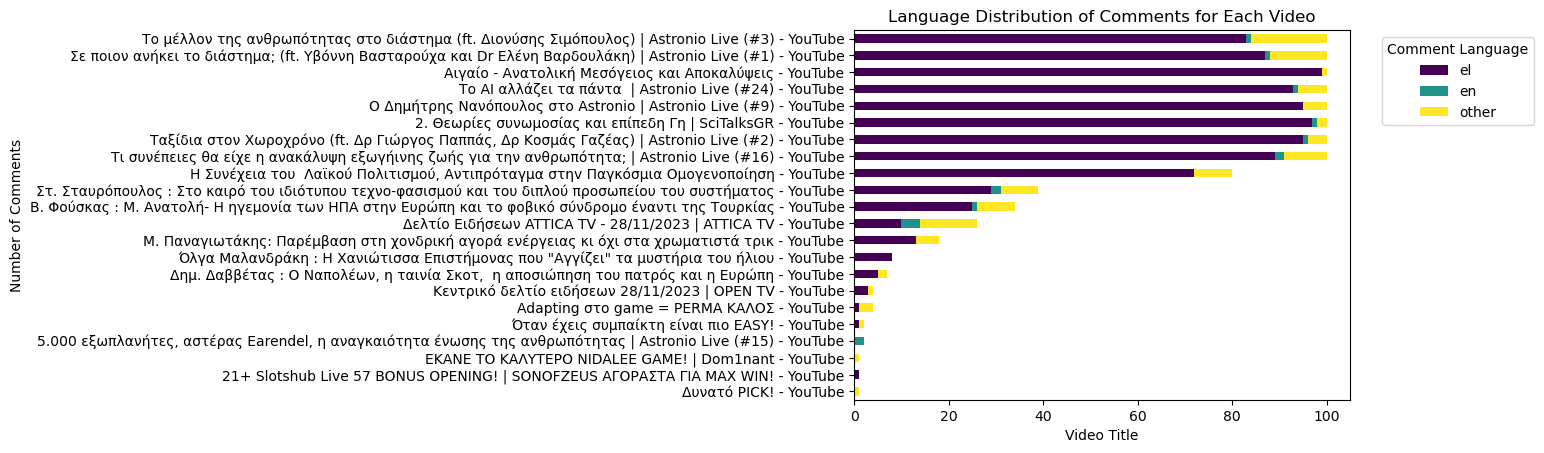

In [22]:
import seaborn as sns
df_count = crawl_df.groupby(['title', 'language']).size().unstack(fill_value=0)
df_count['Total_Comments'] = df_count.sum(axis=1)
df_count = df_count.sort_values(by='Total_Comments', ascending=True).drop('Total_Comments', axis=1)

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
df_count.plot(kind='barh', stacked=True, colormap='viridis')
plt.title('Language Distribution of Comments for Each Video')
plt.xlabel('Video Title')
plt.ylabel('Number of Comments')
plt.legend(title='Comment Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

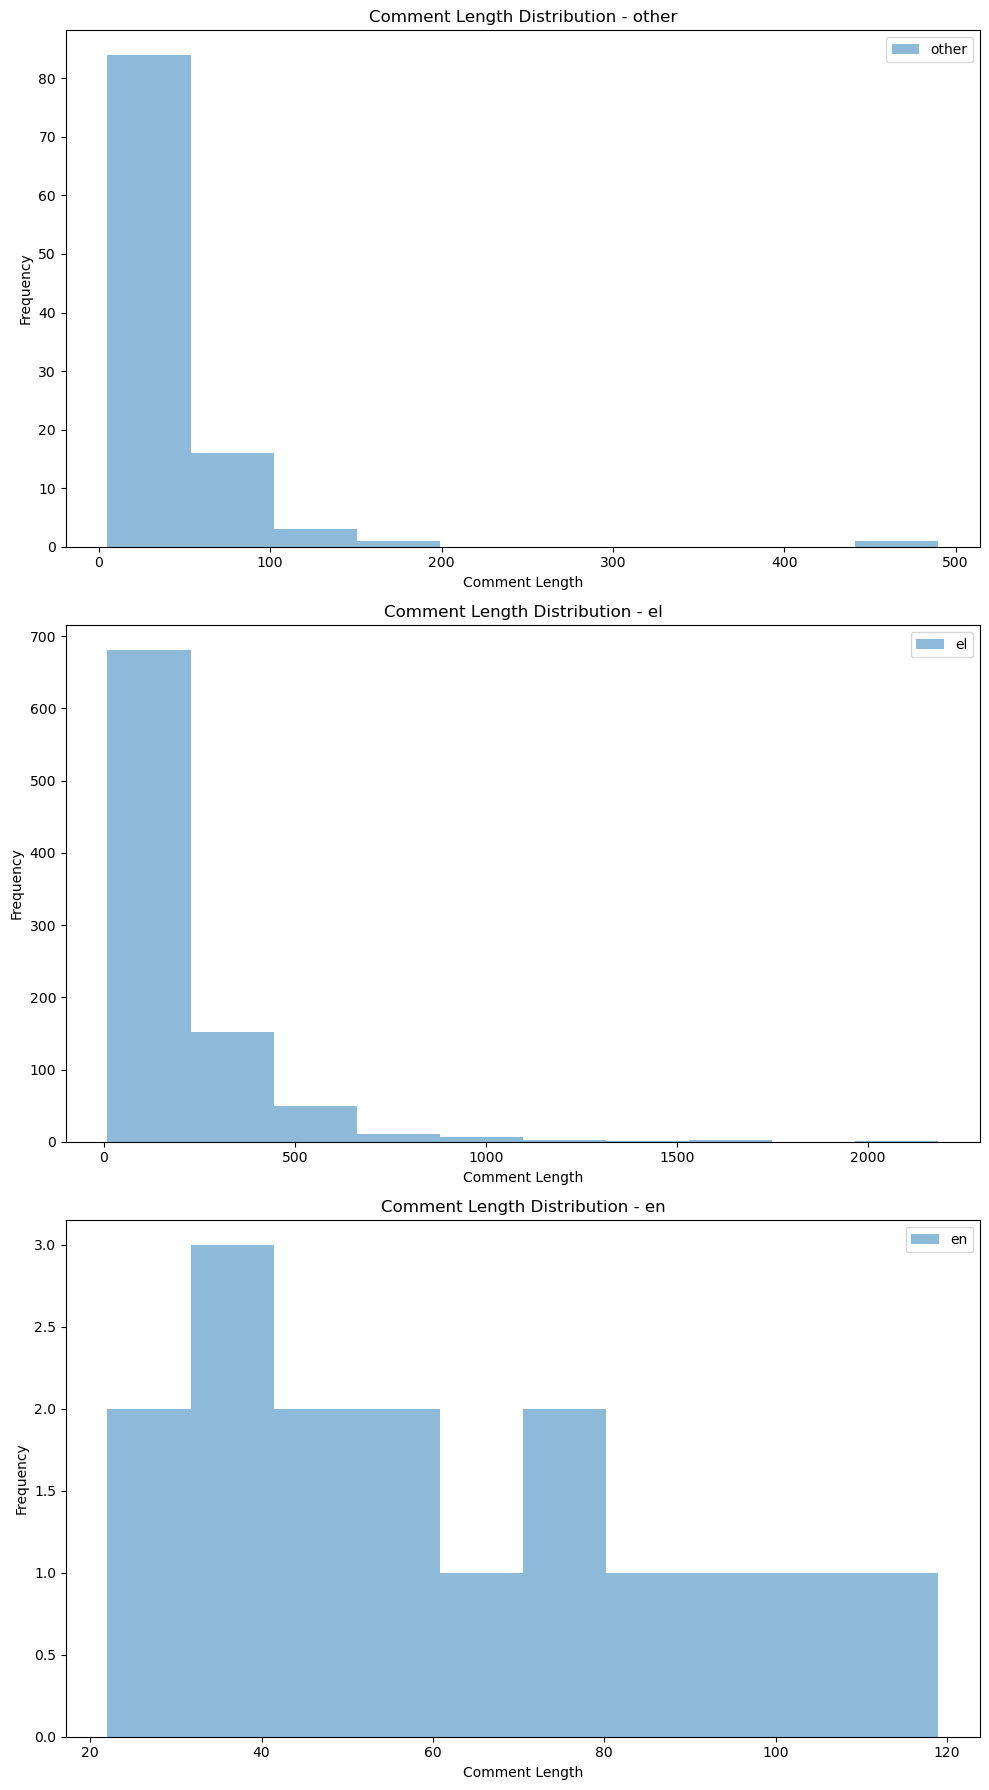

In [25]:
# Adding a column for comment lengths
crawl_df['comment_length'] = crawl_df['comment'].apply(len)

# Plotting histograms per language
languages = crawl_df['language'].unique()
fig, axes = plt.subplots(nrows=len(languages), figsize=(10, 6 * len(languages)))
for i, language in enumerate(languages):
    axes[i].hist(crawl_df[crawl_df['language'] == language]['comment_length'], alpha=0.5, label=language)
    axes[i].set_title(f'Comment Length Distribution - {language}')
    axes[i].set_xlabel('Comment Length')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

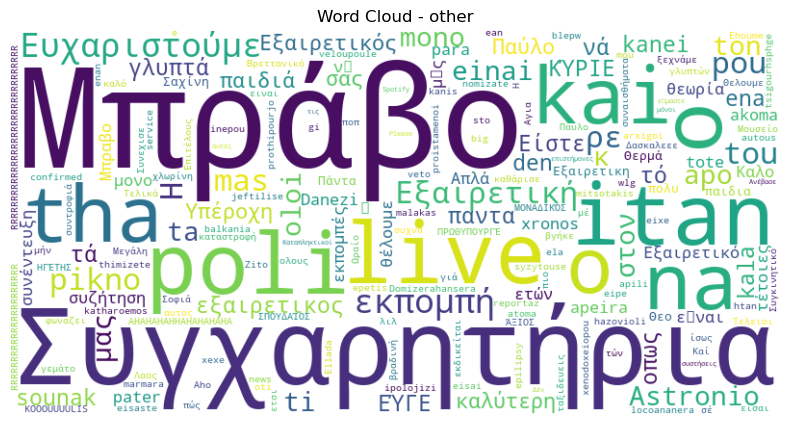

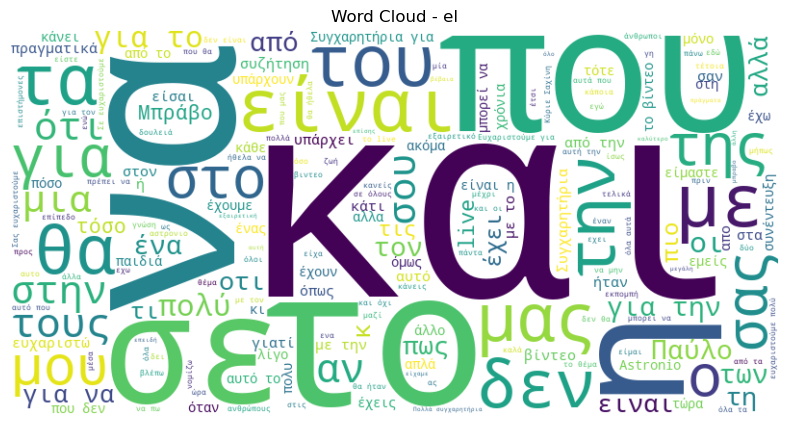

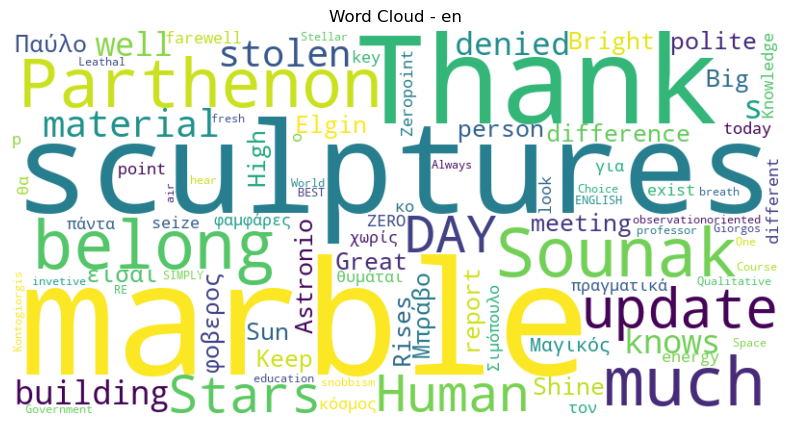

In [28]:
from wordcloud import WordCloud
languages = crawl_df['language'].unique()
for language in languages:
    comments = " ".join(crawl_df[crawl_df['language'] == language]['comment'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - {language}')
    plt.show()

In [ ]:
#crawl_df.to_csv("crawl.csv")